In [1]:
# importing of packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# read the data file
def read_data():
    data=pd.read_csv("C:/top mentor data sci assignmets/14 may/50_Startups.csv")
    return data
data=read_data()
data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [3]:
#renaming columns--
data=data.rename({ "R&D Spend":'R&D',"Marketing Spend":'marketing',"Administration":"administration","State":"state","Profit":"profit"},axis=1)
print(data.head(5))

         R&D  administration  marketing       state     profit
0  165349.20       136897.80  471784.10    New York  192261.83
1  162597.70       151377.59  443898.53  California  191792.06
2  153441.51       101145.55  407934.54     Florida  191050.39
3  144372.41       118671.85  383199.62    New York  182901.99
4  142107.34        91391.77  366168.42     Florida  166187.94


In [4]:
# checking for missing values--
data.isnull().sum()

R&D               0
administration    0
marketing         0
state             0
profit            0
dtype: int64

In [5]:
# print basic info about data--
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")

Index(['R&D', 'administration', 'marketing', 'state', 'profit'], dtype='object')
Data types---
R&D               float64
administration    float64
marketing         float64
state              object
profit            float64
dtype: object
Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&D             50 non-null     float64
 1   administration  50 non-null     float64
 2   marketing       50 non-null     float64
 3   state           50 non-null     object 
 4   profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [6]:
print("Average spend on R&D:")
print(data["R&D"].mean())
print("==========================")
print("Average spend on administration:")
print(data["administration"].mean())
print("==========================")
print("Average spend on marketing:")
print(data["marketing"].mean())
print("==========================")
print("Average profit earned:")
print(data["profit"].mean())
print("==========================")

Average spend on R&D:
73721.61559999999
Average spend on administration:
121344.63959999995
Average spend on marketing:
211025.09780000005
Average profit earned:
112012.63920000002


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lb= LabelEncoder()
data["state"]=lb.fit_transform(data["state"])

In [9]:
print(data.head())
print(data.dtypes)

         R&D  administration  marketing  state     profit
0  165349.20       136897.80  471784.10      2  192261.83
1  162597.70       151377.59  443898.53      0  191792.06
2  153441.51       101145.55  407934.54      1  191050.39
3  144372.41       118671.85  383199.62      2  182901.99
4  142107.34        91391.77  366168.42      1  166187.94
R&D               float64
administration    float64
marketing         float64
state               int32
profit            float64
dtype: object


<AxesSubplot:>

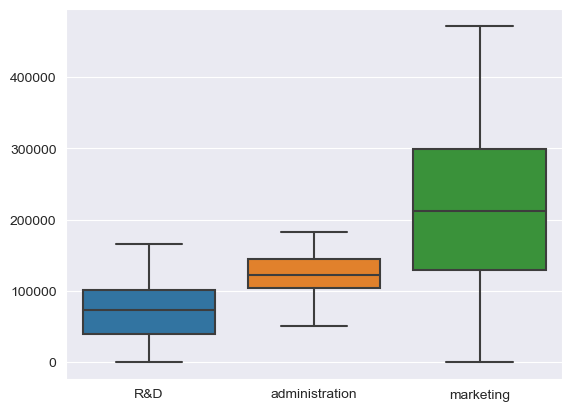

In [10]:
# EDA
# checking for outliers--
sns.boxplot(data=data.loc[:, ['R&D', 'administration','marketing']],palette="tab10")

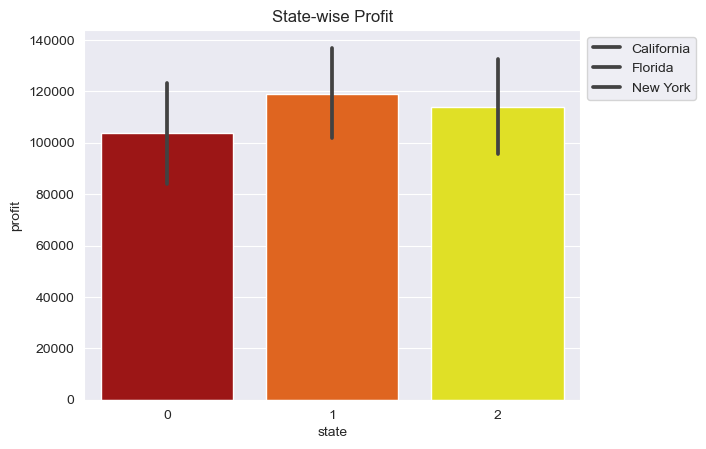

In [11]:
## statewise profit--
ax=sns.barplot(x=data["state"],y=data["profit"],data=data,palette="hot")
plt.title("State-wise Profit")
ax.legend( bbox_to_anchor=(1,1),labels=["California","Florida","New York"])

Text(0.5, 1.0, 'Statewise profit percentages')

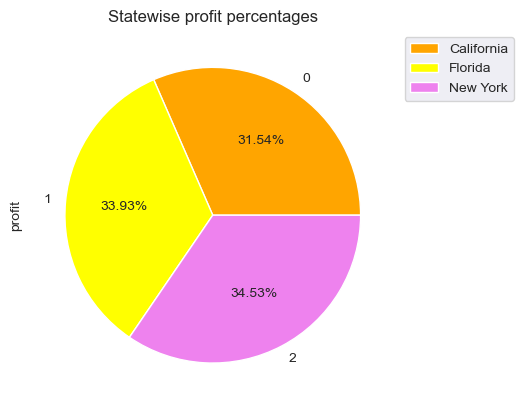

In [12]:
ax=data.groupby(["state"])["profit"].sum().plot(kind="pie",colors=['orange','yellow','violet'],autopct='%.2f%%')
ax.legend( bbox_to_anchor=(1,1),labels=["California","Florida","New York"])
plt.title("Statewise profit percentages")

Text(0.5, 1.0, 'R&D Spend VS Profit')

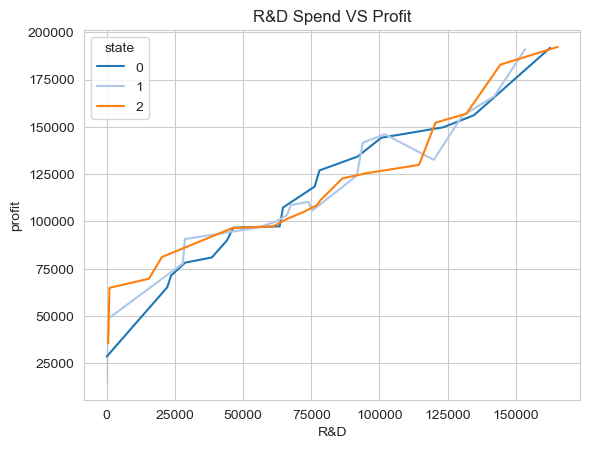

In [13]:
sns.set_style("whitegrid")
sns.lineplot(x="R&D",y="profit",data=data,hue="state",palette='tab20')
plt.title("R&D Spend VS Profit")

Text(0.5, 1.0, 'Administration Spend VS Profit')

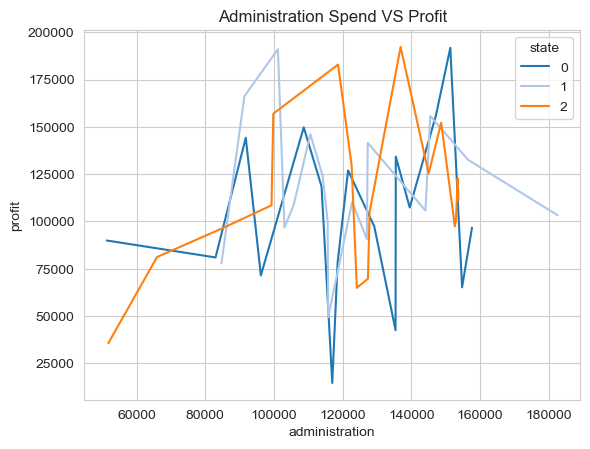

In [14]:
sns.set_style("whitegrid")
sns.lineplot(x="administration",y="profit",data=data,hue="state",palette= 'tab20')
plt.title("Administration Spend VS Profit")

Text(0.5, 1.0, 'Marketing Spend VS Profit')

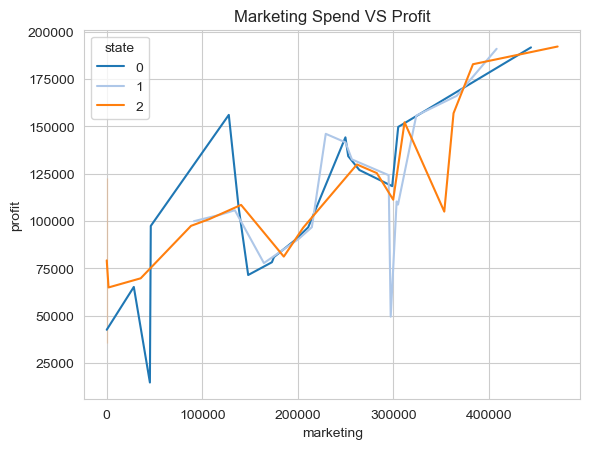

In [15]:
sns.set_style("whitegrid")
sns.lineplot(x="marketing",y="profit",data=data,hue="state",palette="tab20")
plt.title("Marketing Spend VS Profit")

<AxesSubplot:>

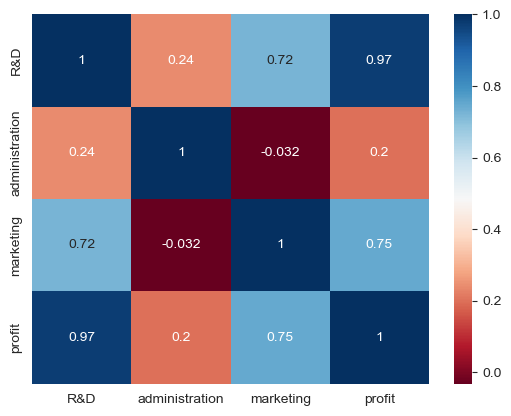

In [16]:
sns.heatmap(data[["R&D","administration","marketing","profit"]].corr(),annot=True,cmap="RdBu")

## Q prediction model for profit of 50_startups data:

In [17]:
### multiple linear regression :
df=data[["R&D","administration","marketing","profit"]]
print(df.head())

         R&D  administration  marketing     profit
0  165349.20       136897.80  471784.10  192261.83
1  162597.70       151377.59  443898.53  191792.06
2  153441.51       101145.55  407934.54  191050.39
3  144372.41       118671.85  383199.62  182901.99
4  142107.34        91391.77  366168.42  166187.94


In [18]:
df.shape

(50, 4)

In [19]:
#sampling of data
training,testing=train_test_split(df,test_size=0.2)

In [20]:
training.head()

,R&D,administration,marketing,profit
5,131876.90,99814.71,362861.36,156991.12
48,542.05,51743.15,0.00,35673.41
33,55493.95,103057.49,214634.81,96778.92
47,0.00,135426.92,0.00,42559.73
44,22177.74,154806.14,28334.72,65200.33


In [21]:
testing.head()

,R&D,administration,marketing,profit
16,78013.11,121597.55,264346.06,126992.93
9,123334.88,108679.17,304981.62,149759.96
18,91749.16,114175.79,294919.57,124266.90
24,77044.01,99281.34,140574.81,108552.04
13,91992.39,135495.07,252664.93,134307.35


In [22]:
training.shape,testing.shape

((40, 4), (10, 4))

In [23]:
#Defining
X_train=training[["R&D","administration","marketing"]]
y_train=training["profit"]

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()
print(model)

LinearRegression()


In [26]:
train_model=model.fit(X_train,y_train)
print("Model training is completed")
print(train_model)

Model training is completed
LinearRegression()


In [27]:
print(model.coef_)
print(model.intercept_)

[ 0.81932168 -0.0219599   0.02108469]
49224.59581921634


In [28]:
RD =76253.86
administration=113867.30
marketing=298664.47
y =0.80733789*RD -0.02881059*administration+ 0.02881124*marketing + 50343.43195926117
print("Profit earned with R&D spend of {},administration spend of {} and marketing spend of {} is {} ".format(RD,administration,marketing,y))

Profit earned with R&D spend of 76253.86,administration spend of 113867.3 and marketing spend of 298664.47 is 117230.37202595237 


<AxesSubplot:xlabel='R&D', ylabel='profit'>

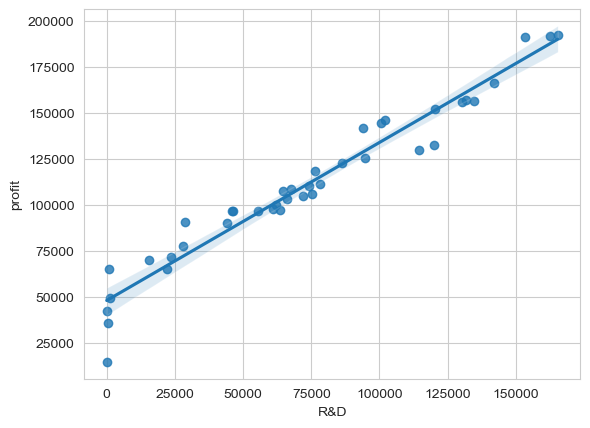

In [29]:
sns.regplot(x="R&D",y="profit",data=training)

<AxesSubplot:xlabel='administration', ylabel='profit'>

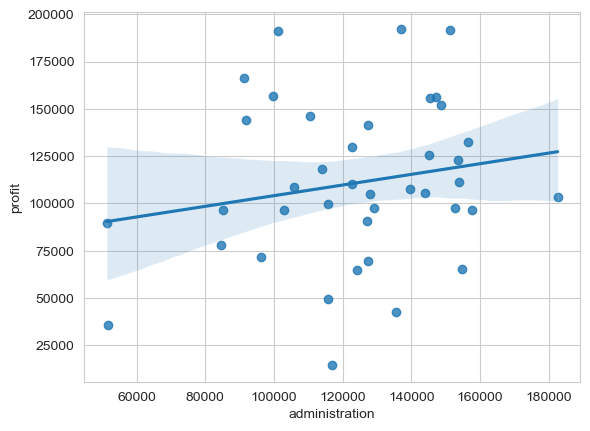

In [30]:
sns.regplot(x="administration",y="profit",data=training)

<AxesSubplot:xlabel='marketing', ylabel='profit'>

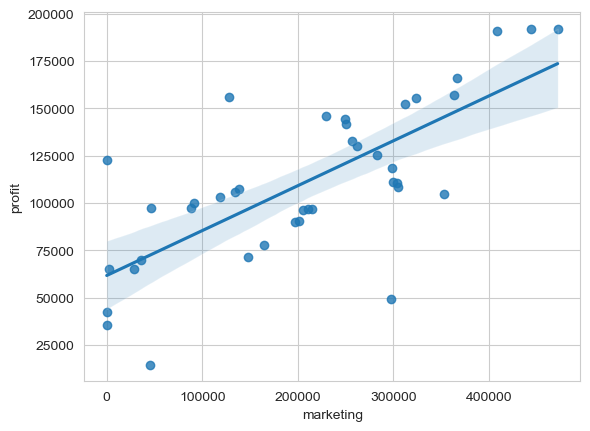

In [31]:
sns.regplot(x="marketing",y="profit",data=training)

In [32]:
X_test=testing[["R&D","administration","marketing"]]
X_test

,R&D,administration,marketing
16,78013.11,121597.55,264346.06
9,123334.88,108679.17,304981.62
18,91749.16,114175.79,294919.57
24,77044.01,99281.34,140574.81
13,91992.39,135495.07,252664.93
39,38558.51,82982.09,174999.30
29,65605.48,153032.06,107138.38
40,28754.33,118546.05,172795.67
38,20229.59,65947.93,185265.10
3,144372.41,118671.85,383199.62


In [33]:
pred_profit=train_model.predict(X_test)
pred_profit

array([116045.81433919, 154319.39782275, 128107.6721143 , 113132.19249626,
       126947.86039299,  82683.94755768, 101874.99968175,  73823.72653309,
        68257.18563302, 172985.66663602])

In [34]:
testing["pred_profit"]=pred_profit
testing

,R&D,administration,marketing,profit,pred_profit
16,78013.11,121597.55,264346.06,126992.93,116045.814339
9,123334.88,108679.17,304981.62,149759.96,154319.397823
18,91749.16,114175.79,294919.57,124266.90,128107.672114
24,77044.01,99281.34,140574.81,108552.04,113132.192496
13,91992.39,135495.07,252664.93,134307.35,126947.860393
39,38558.51,82982.09,174999.30,81005.76,82683.947558
29,65605.48,153032.06,107138.38,101004.64,101874.999682
40,28754.33,118546.05,172795.67,78239.91,73823.726533
38,20229.59,65947.93,185265.10,81229.06,68257.185633
3,144372.41,118671.85,383199.62,182901.99,172985.666636


In [35]:
testing["Error"]=testing["profit"]-testing["pred_profit"]
testing

,R&D,administration,marketing,profit,pred_profit,Error
16,78013.11,121597.55,264346.06,126992.93,116045.814339,10947.115661
9,123334.88,108679.17,304981.62,149759.96,154319.397823,-4559.437823
18,91749.16,114175.79,294919.57,124266.90,128107.672114,-3840.772114
24,77044.01,99281.34,140574.81,108552.04,113132.192496,-4580.152496
13,91992.39,135495.07,252664.93,134307.35,126947.860393,7359.489607
39,38558.51,82982.09,174999.30,81005.76,82683.947558,-1678.187558
29,65605.48,153032.06,107138.38,101004.64,101874.999682,-870.359682
40,28754.33,118546.05,172795.67,78239.91,73823.726533,4416.183467
38,20229.59,65947.93,185265.10,81229.06,68257.185633,12971.874367
3,144372.41,118671.85,383199.62,182901.99,172985.666636,9916.323364


In [36]:
round(r2_score(testing['profit'],testing['pred_profit'])*100,2)

94.94

<AxesSubplot:xlabel='R&D', ylabel='profit'>

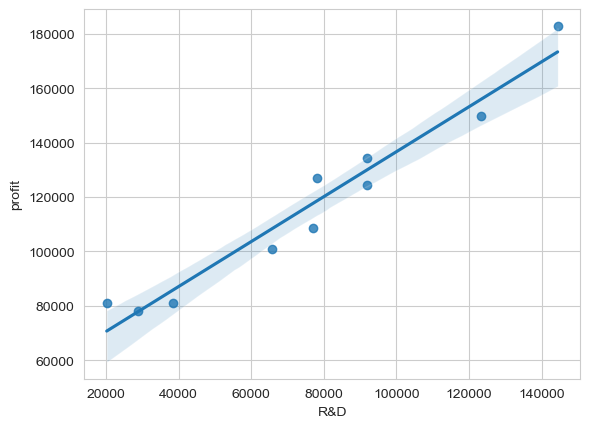

In [37]:
sns.regplot(x="R&D",y="profit",data=testing)

<AxesSubplot:xlabel='administration', ylabel='profit'>

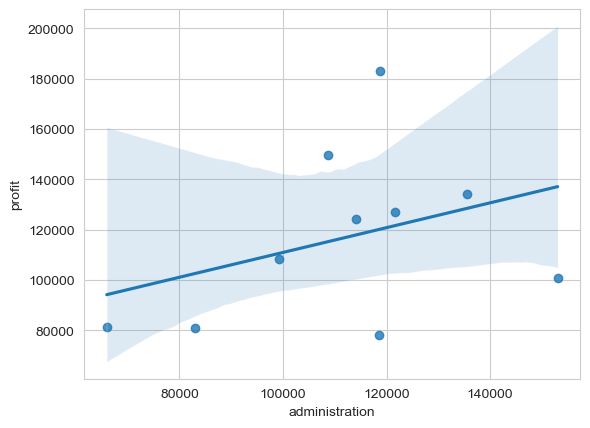

In [38]:
sns.regplot(x="administration",y="profit",data=testing)

<AxesSubplot:xlabel='marketing', ylabel='profit'>

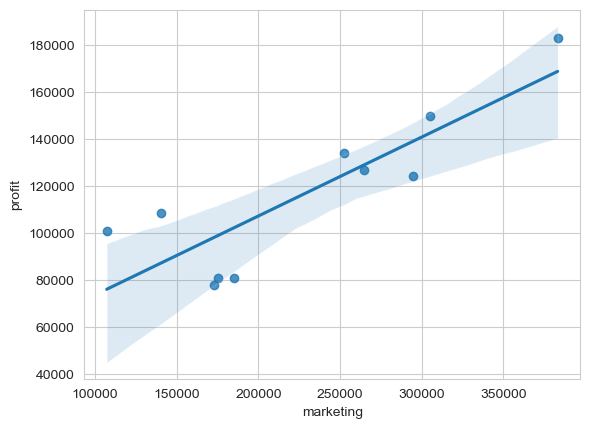

In [39]:
sns.regplot(x="marketing",y="profit",data=testing)